KEY FINDINGS:
    
    Logistic Regression, XGB  and GaussianNB Models proved to be an approriate fit for our DF. 
    The Data Frame was imbalanced; we needed to use SMOTE() from the imblearn library to balance out the DF.
    The AUC for the three models were above 0.80. XGB and Gaussian models had the highest with .99.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%%time
# I like to disable my Notebook Warnings. 
import warnings
warnings.filterwarnings('ignore')

Wall time: 0 ns


In [3]:
%%time
# Configure notebook display settings to only use 2 decimal places, tables look nicer.
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None )

Wall time: 0 ns


In [4]:
# Read the dataset from an excel file ...
#The_Excel_path = r'C:\Users\GINA\Documents\UKData_1990_2014_Customised.xlsx'

DF = pd.read_excel(The_Excel_path)

Understanding What Was Loaded

In [5]:
DF.head()

Firm_id  year  y   PR-ReturnOnAssets  PR-NetIncome_to_Sales  \
0     8812  2010   0              -0.01                  -0.27   
1     9253  2010   0              -0.01                  -0.02   
2     7229  2010   0               0.02                   0.10   
3     8469  2010   0               0.02                   0.05   
4     9513  2010   0               0.02                   0.02   

   PR-NegativeNetIncomeForLastTwoYears  L-CurrentAssets_to_CurrentLiabilities  \
0                                    1                                   6.05   
1                                    0                                   2.56   
2                                    0                                   0.21   
3                                    0                                   2.32   
4                                    0                                   1.21   

   L-CurrentAssetsTurnonver  L-QuickRatio  \
0                      0.23          5.92   
1                      1.14          1.67   
2                      2.36          0.21   
3                      1.11          1.67   
4                      3.01          0.78   

   L-CurrentAssets_to_TotalLiabilities  CF-CashandEquivalent_to_Assets  \
0                                 2.34                            0.20   
1                                 1.68                            0.14   
2                                 0.23                            0.05   
3                                 2.72                            0.05   
4                                 0.67                            0.09   

   CF-OperatingCashFlow_to_Assets  CF-FreeCashFlowfromOperations_to_Sales  \
0                           -0.00                                   -0.08   
1                            0.06                                    0.13   
2                            0.05                                    0.26   
3                            0.08                                    0.17   
4                           -0.00                                   -0.00   

   CSSR-TotalDebtRatio  CSSR-LongTermDebt_to_Equity  \
0                 0.10                         0.14   
1                 0.26                         0.39   
2                 0.37                         0.01   
3                 0.15                         0.21   
4                 0.40                         0.98   

   CSSR-InterestCoverageRatio  AUR-AssetTurnoverRatio  FC-LOG_Sales  \
0                      -54.66                    0.05         12.73   
1                        0.18                    0.50         13.19   
2                        2.39                    0.20          7.82   
3                        6.08                    0.46          9.48   
4                        1.57                    0.81         15.69   

   FC-Log_Age  MI-RealSize  MI-LagExcessReturn  MI-LagSigma  
0        2.20         2.03                0.25       388.76  
1        1.61         4.46                0.71       109.00  
2        2.71         1.60                0.68         2.13  
3        2.30       -12.75                0.75        41.00  
4        1.61         9.19                0.68       580.00

In [6]:
%%time
# Describe the numerical data fields...
DF.describe()

Wall time: 112 ms


Firm_id     year       y   PR-ReturnOnAssets  PR-NetIncome_to_Sales  \
count 6,605.00 6,605.00 6,605.00           6,605.00               6,605.00   
mean  6,867.04 2,011.89     0.06              -0.15                 -11.64   
std   2,426.15     1.41     0.24               1.47                 189.20   
min     109.00 2,010.00     0.00             -34.98             -12,765.00   
25%   5,655.00 2,011.00     0.00              -0.12                  -0.48   
50%   7,614.00 2,012.00     0.00               0.01                   0.01   
75%   8,687.00 2,013.00     0.00               0.06                   0.07   
max   9,873.00 2,014.00     1.00              74.58                 285.90   

       PR-NegativeNetIncomeForLastTwoYears  \
count                             6,605.00   
mean                                  0.35   
std                                   0.48   
min                                   0.00   
25%                                   0.00   
50%                                   0.00   
75%                                   1.00   
max                                   1.00   

       L-CurrentAssets_to_CurrentLiabilities  L-CurrentAssetsTurnonver  \
count                               6,605.00                  6,605.00   
mean                                    4.06                      2.15   
std                                    18.35                      2.37   
min                                     0.01                      0.00   
25%                                     0.96                      0.61   
50%                                     1.48                      1.89   
75%                                     2.79                      2.95   
max                                   797.65                     62.28   

       L-QuickRatio  L-CurrentAssets_to_TotalLiabilities  \
count      6,605.00                             6,605.00   
mean           3.74                               232.55   
std           18.33                             1,923.72   
min           -0.38                                 0.00   
25%            0.76                                 1.18   
50%            1.17                                 3.35   
75%            2.30                                24.90   
max          797.65                            50,068.00   

       CF-CashandEquivalent_to_Assets  CF-OperatingCashFlow_to_Assets  \
count                        6,605.00                        6,605.00   
mean                             0.19                           -0.04   
std                              0.21                            0.41   
min                              0.00                           -9.96   
25%                              0.04                           -0.07   
50%                              0.11                            0.04   
75%                              0.24                            0.11   
max                              1.00                            2.80   

       CF-FreeCashFlowfromOperations_to_Sales  CSSR-TotalDebtRatio  \
count                                6,605.00             6,605.00   
mean                                    -7.64                 0.18   
std                                    114.55                 0.44   
min                                 -6,075.33                 0.00   
25%                                     -0.22                 0.00   
50%                                      0.04                 0.09   
75%                                      0.13                 0.25   
max                                    125.00                17.91   

       CSSR-LongTermDebt_to_Equity  CSSR-InterestCoverageRatio  \
count                     6,605.00                    6,605.00   
mean                          0.81                      -79.25   
std                          60.82                    2,579.19   
min                        -115.27                  -48,143.00   
25%                           0.00                      -19.75

#Recall that Distressed = 1 and  Healthy = 0. We may try to rename the column much later for clarity.





In [7]:
%%time
# Checking the total amount of empty values in the dataset
print(f' Missing Data: {DF.isnull().sum().sum(): 5,.0f} Values')
print('')

 Missing Data:     0 Values

Wall time: 0 ns


In [8]:
%%time
# Checking for unique values in the dataset...
DF.nunique()

Wall time: 54.8 ms


Firm_id                                   1557
year                                         5
y                                            2
PR-ReturnOnAssets                         6035
PR-NetIncome_to_Sales                     5342
PR-NegativeNetIncomeForLastTwoYears          2
L-CurrentAssets_to_CurrentLiabilities     5952
L-CurrentAssetsTurnonver                  5267
L-QuickRatio                              6007
L-CurrentAssets_to_TotalLiabilities       4531
CF-CashandEquivalent_to_Assets            5942
CF-OperatingCashFlow_to_Assets            6034
CF-FreeCashFlowfromOperations_to_Sales    5347
CSSR-TotalDebtRatio                       4289
CSSR-LongTermDebt_to_Equity               3576
CSSR-InterestCoverageRatio                4788
AUR-AssetTurnoverRatio                    5265
FC-LOG_Sales                              5037
FC-Log_Age                                  57
MI-RealSize                               6006
MI-LagExcessReturn                        6061
MI-LagSigma  

In [9]:
DF.isnull().sum().sort_values()

Firm_id                                   0
MI-RealSize                               0
FC-Log_Age                                0
FC-LOG_Sales                              0
AUR-AssetTurnoverRatio                    0
CSSR-InterestCoverageRatio                0
CSSR-LongTermDebt_to_Equity               0
CSSR-TotalDebtRatio                       0
CF-FreeCashFlowfromOperations_to_Sales    0
CF-OperatingCashFlow_to_Assets            0
CF-CashandEquivalent_to_Assets            0
L-CurrentAssets_to_TotalLiabilities       0
L-QuickRatio                              0
L-CurrentAssetsTurnonver                  0
L-CurrentAssets_to_CurrentLiabilities     0
PR-NegativeNetIncomeForLastTwoYears       0
PR-NetIncome_to_Sales                     0
PR-ReturnOnAssets                         0
y                                         0
year                                      0
MI-LagExcessReturn                        0
MI-LagSigma                               0
dtype: int64

In [10]:
DF.columns

uc = ['L-CurrentAssets_to_TotalLiabilities','L-QuickRatio','CF-CashandEquivalent_to_Assets','year','CSSR-TotalDebtRatio','Firm_id','y ' ,'MI-LagExcessReturn','PR-NegativeNetIncomeForLastTwoYears']

<AxesSubplot:xlabel='y ', ylabel='count'>

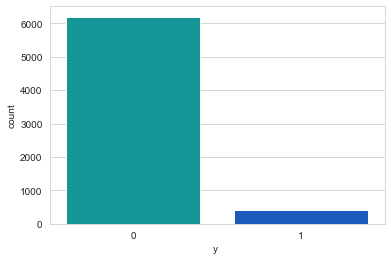

In [11]:
sns.set_style('whitegrid')

sns.countplot(x = 'y ', data = DF, palette = 'winter_r' )

In [12]:
#These features have negative correlation with the Dependent column Y. We will remove them and use features that are correlated.


how_correlated= DF.corr()['y '].sort_values()[13:22]

how_correlated


J = pd.DataFrame(data = how_correlated)

J

y 
L-CurrentAssets_to_CurrentLiabilities 0.00
L-QuickRatio                          0.00
CF-CashandEquivalent_to_Assets        0.03
year                                  0.05
CSSR-TotalDebtRatio                   0.07
Firm_id                               0.07
MI-LagExcessReturn                    0.11
PR-NegativeNetIncomeForLastTwoYears   0.24
y                                     1.00

<AxesSubplot:>

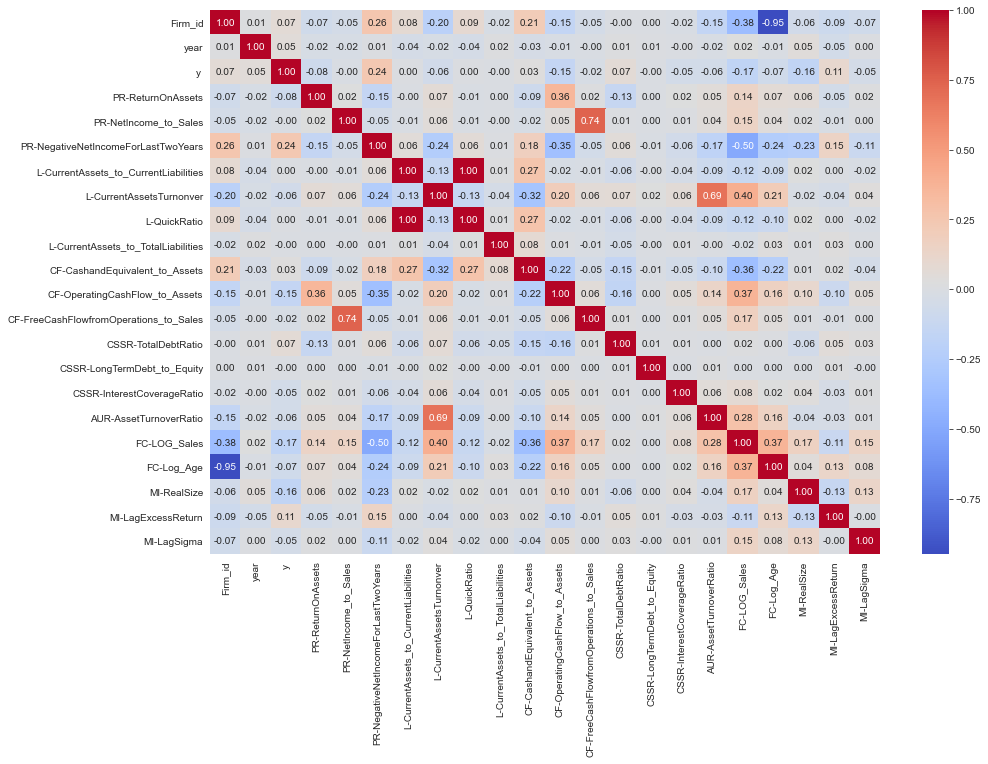

In [247]:
plt.figure(figsize = (15, 10))

sns.heatmap(DF.corr(),annot = True, cmap = 'coolwarm', fmt ='.2f')

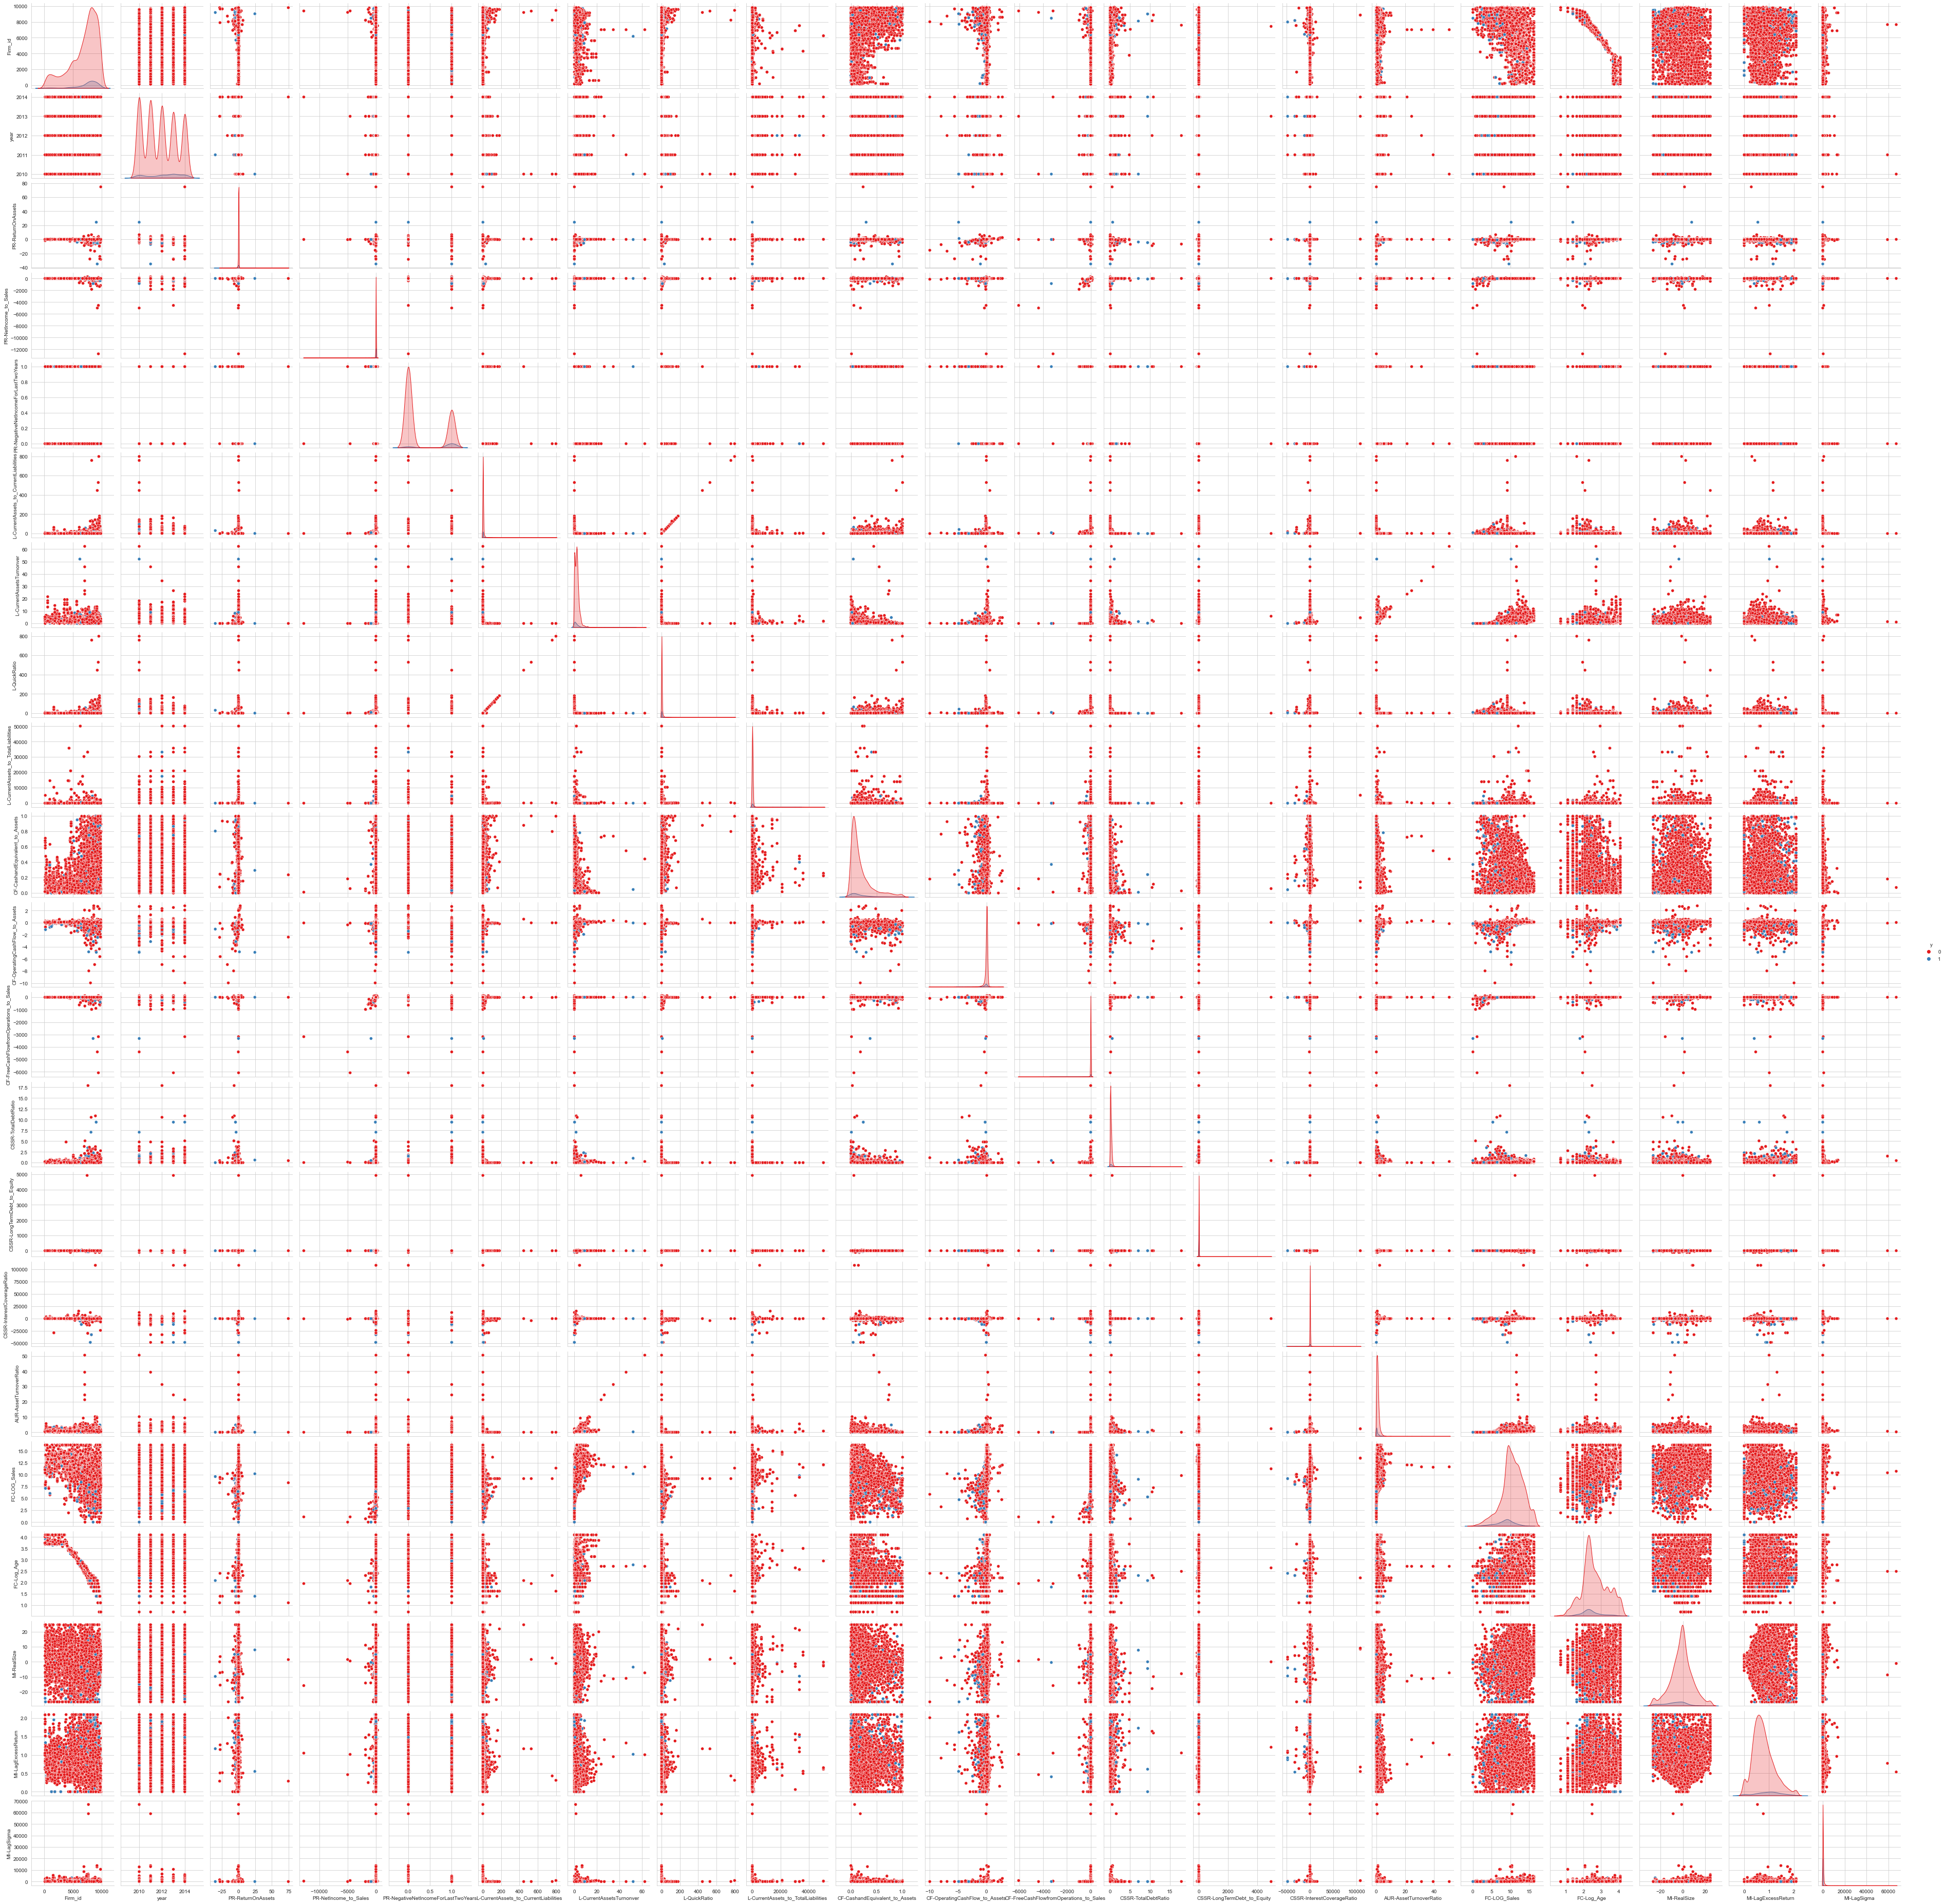

In [238]:
sns.pairplot(DF,hue='y ',palette='Set1')

Text(0.5, 0, 'y')

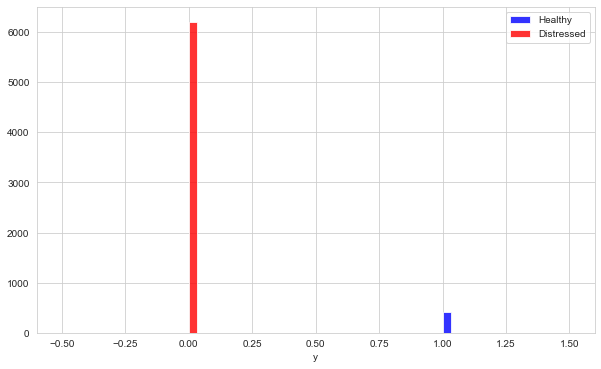

In [14]:
plt.figure(figsize=(10,6))
DF[DF['y ']==1]['y '].hist(alpha=0.8,color='blue',bins=30,label='Healthy')
DF[DF['y ']==0]['y '].hist(alpha=0.8,color='red',bins=30,label='Distressed')
plt.legend()
plt.xlabel('y')

In [15]:
DF['year'].value_counts()

2010    1470
2011    1381
2012    1324
2013    1244
2014    1186
Name: year, dtype: int64

In [162]:
year_2010 = DF[DF['year'] == 2010]
year_2011 = DF[DF['year'] == 2011]
year_2012 = DF[DF['year'] == 2012]
year_2013 = DF[DF['year'] == 2013]
year_2014 = DF[DF['year'] == 2014]

In [163]:
DF['y '].value_counts()

# 0 for healthy
# 1 for distressed


0    6198
1     407
Name: y , dtype: int64

#Our DF is not balanced and this may impact our accuracy. We will do two things in the course of our analysis. We will reduce the number of dimensions and use SMOTE from Imblearn to balance the DF

In [164]:
year_2014.head()

Firm_id  year  y   PR-ReturnOnAssets  PR-NetIncome_to_Sales  \
622     9712  2014   0              -0.47                  -3.85   
623      615  2014   0               0.02                   0.01   
624     6529  2014   0               0.01                   0.03   
625     9458  2014   0               0.10                   0.20   
626     7594  2014   0              -0.12                  -0.43   

     PR-NegativeNetIncomeForLastTwoYears  \
622                                    1   
623                                    1   
624                                    0   
625                                    0   
626                                    0   

     L-CurrentAssets_to_CurrentLiabilities  L-CurrentAssetsTurnonver  \
622                                   0.68                      2.05   
623                                   2.02                      2.20   
624                                   3.84                      1.99   
625                                   1.77                      2.34   
626                                   1.85                      0.70   

     L-QuickRatio  L-CurrentAssets_to_TotalLiabilities  \
622          0.66                                 0.10   
623          1.92                                 1.79   
624          3.73                                 7.99   
625          1.70                                 1.52   
626          1.81                                 2.82   

     CF-CashandEquivalent_to_Assets  CF-OperatingCashFlow_to_Assets  \
622                            0.03                            0.01   
623                            0.18                            0.05   
624                            0.13                            0.19   
625                            0.18                            0.13   
626                            0.22                            0.15   

     CF-FreeCashFlowfromOperations_to_Sales  CSSR-TotalDebtRatio  \
622                                    0.05                 0.61   
623                                    0.04                 0.32   
624                                    0.56                 0.00   
625                                    0.28                 0.14   
626                                    0.52                 0.15   

     CSSR-LongTermDebt_to_Equity  CSSR-InterestCoverageRatio  \
622                         3.15                       -4.19   
623                         1.42                        4.92   
624                         0.00                      238.97   
625                         0.10                       13.93   
626                         0.00                      -15.64   

     AUR-AssetTurnoverRatio  FC-LOG_Sales  FC-Log_Age  MI-RealSize  \
622                    0.12         10.37        1.10         0.13   
623                    1.26         13.46        4.09        11.89   
624                    0.33         12.51        2.89        -0.26   
625                    0.48         11.97        1.79        -4.71   
626                    0.29         11.77        2.48        -0.88   

     MI-LagExcessReturn  MI-LagSigma  
622                1.01        26.23  
623                0.53       278.25  
624                0.76       373.70  
625                0.22       172.00  
626                0.33       118.75

In [165]:
Training_data = pd.concat([year_2010,year_2011,year_2012])
Testing_data = pd.concat([year_2013,year_2014])

In [166]:
Training_data.head()


Firm_id  year  y   PR-ReturnOnAssets  PR-NetIncome_to_Sales  \
0     8812  2010   0              -0.01                  -0.27   
1     9253  2010   0              -0.01                  -0.02   
2     7229  2010   0               0.02                   0.10   
3     8469  2010   0               0.02                   0.05   
4     9513  2010   0               0.02                   0.02   

   PR-NegativeNetIncomeForLastTwoYears  L-CurrentAssets_to_CurrentLiabilities  \
0                                    1                                   6.05   
1                                    0                                   2.56   
2                                    0                                   0.21   
3                                    0                                   2.32   
4                                    0                                   1.21   

   L-CurrentAssetsTurnonver  L-QuickRatio  \
0                      0.23          5.92   
1                      1.14          1.67   
2                      2.36          0.21   
3                      1.11          1.67   
4                      3.01          0.78   

   L-CurrentAssets_to_TotalLiabilities  CF-CashandEquivalent_to_Assets  \
0                                 2.34                            0.20   
1                                 1.68                            0.14   
2                                 0.23                            0.05   
3                                 2.72                            0.05   
4                                 0.67                            0.09   

   CF-OperatingCashFlow_to_Assets  CF-FreeCashFlowfromOperations_to_Sales  \
0                           -0.00                                   -0.08   
1                            0.06                                    0.13   
2                            0.05                                    0.26   
3                            0.08                                    0.17   
4                           -0.00                                   -0.00   

   CSSR-TotalDebtRatio  CSSR-LongTermDebt_to_Equity  \
0                 0.10                         0.14   
1                 0.26                         0.39   
2                 0.37                         0.01   
3                 0.15                         0.21   
4                 0.40                         0.98   

   CSSR-InterestCoverageRatio  AUR-AssetTurnoverRatio  FC-LOG_Sales  \
0                      -54.66                    0.05         12.73   
1                        0.18                    0.50         13.19   
2                        2.39                    0.20          7.82   
3                        6.08                    0.46          9.48   
4                        1.57                    0.81         15.69   

   FC-Log_Age  MI-RealSize  MI-LagExcessReturn  MI-LagSigma  
0        2.20         2.03                0.25       388.76  
1        1.61         4.46                0.71       109.00  
2        2.71         1.60                0.68         2.13  
3        2.30       -12.75                0.75        41.00  
4        1.61         9.19                0.68       580.00

In [167]:
print(Training_data.shape)
print(Testing_data.shape)

(4175, 22)
(2430, 22)


In [168]:
#We will remove some features in the DF that are negatively correlated with the y column which is a dependent column.
TrainingDatt= Training_data[['L-CurrentAssets_to_TotalLiabilities','L-QuickRatio','CF-CashandEquivalent_to_Assets','CSSR-TotalDebtRatio','MI-LagExcessReturn','PR-NegativeNetIncomeForLastTwoYears','y ']]


In [169]:
TrainingDatt
    
    


L-CurrentAssets_to_TotalLiabilities  L-QuickRatio  \
0                                    2.34          5.92   
1                                    1.68          1.67   
2                                    0.23          0.21   
3                                    2.72          1.67   
4                                    0.67          0.78   
5                                    6.50         17.28   
6                                    6.71          2.55   
7                                    0.71          2.89   
8                                2,567.92          1.69   
9                                    0.82          0.59   
10                                   0.63          0.89   
11                                   0.62          0.31   
12                                   2.33          3.43   
13                                   0.38          0.50   
14                                   0.77          0.34   
15                                   8.58          1.71   
16                                   0.24          0.22   
17                                   1.64          0.15   
18                                   3.87          5.95   
19                                  35.61          9.81   
20                                   2.24          2.28   
21                                   1.53          1.29   
22                                 118.55         26.46   
23                                   0.13         15.03   
24                                   0.49          0.95   
25                                   0.93          0.53   
26                                   0.19          0.72   
27                                   0.28         15.90   
28                                   1.15          0.83   
29                                   0.20          1.26   
30                                   3.34          4.76   
31                                   3.53          0.79   
32                                  13.18          0.61   
33                                   0.92          0.50   
34                                   0.16          0.12   
35                                   1.78          1.91   
36                                   6.84          2.54   
37                                   0.09          5.23   
38                                   0.14          0.78   
39                                   0.15          0.13   
40                                   1.25          0.73   
41                                   0.66          1.60   
42                                   0.76          1.30   
43                                   2.73          8.86   
44                                   0.16          0.07   
45                                   0.55          1.04   
46                                   3.26          6.43   
47                                   1.33          0.76   
48                              17,435.75          2.02   
49                                   0.24          0.13   
50                                 356.99         75.69   
51                                 356.99          5.70   
52                                   0.89          4.22   
53                                   1.15          0.83   
54                                   0.78          1.54   
55                                   1.15          1.08   
56                                   1.20          2.57   
57                                   0.10          0.05   
58                                  33.95          0.81   
59                                 356.99          3.07   
60                                   0.05          0.04   
61                                  25.95          3.84   
62                                 356.99        756.84   
63                                   0.96          0.44   
64                                  36.20         14.20   
65                                   1.47          0.73   
66                              14,511.00          1.

In [170]:
TrainingDatt.shape

(4175, 7)

In [171]:
TestingDatt = Testing_data[['L-CurrentAssets_to_TotalLiabilities','L-QuickRatio','CF-CashandEquivalent_to_Assets','CSSR-TotalDebtRatio','MI-LagExcessReturn','PR-NegativeNetIncomeForLastTwoYears','y ']]
TestingDatt

L-CurrentAssets_to_TotalLiabilities  L-QuickRatio  \
471                                  2.66          1.41   
472                                356.99          6.42   
473                                 12.92          1.16   
474                                  2.18          1.94   
475                                  0.54          1.48   
476                                 10.34          4.60   
477                                  2.22          1.85   
478                                  0.24          0.14   
479                                  4.40          1.42   
480                                  1.46          0.64   
481                                  1.33          2.83   
482                                  0.99          2.06   
483                                  3.71          3.25   
484                                356.99          1.78   
485                                356.99          4.70   
486                                  0.13         17.77   
487                                  0.41          0.76   
488                                  8.62          1.55   
489                                  0.85          0.73   
490                                  6.38          2.04   
491                                  0.97          1.11   
492                                356.99          1.65   
493                                  0.23          0.46   
494                              1,047.74          4.32   
495                                  4.06          6.87   
496                                  0.68          1.65   
497                                  2.04          2.43   
498                                  0.49          0.73   
499                                  1.78          1.82   
500                                  0.67          1.23   
501                                  0.62          5.25   
502                                  0.10          2.03   
503                                356.99          1.14   
504                                  0.70          0.78   
505                                113.07          2.88   
506                                  1.28          0.50   
507                                  2.20          1.25   
508                                356.99          0.39   
509                                  0.63          0.74   
510                                 18.87          0.88   
511                                356.99          1.00   
512                                356.99         21.33   
513                                  1.85          1.89   
514                                  2.71          1.35   
515                                356.99          8.55   
516                                  1.26          3.94   
517                                 46.64         64.10   
518                                356.99         14.96   
519                                  0.57          0.55   
520                              4,975.17          9.94   
521                                  0.24          0.10   
522                                  1.15          0.83   
523                                  0.88          0.66   
524                                  3.53          0.91   
525                                356.99        104.79   
526                                  0.14          0.09   
527                                  0.46          4.51   
528                                  1.00          9.69   
529                                  0.19          0.41   
530                                  0.20          0.43   
531                                  7.31          1.70   
532                                356.99         12.79   
533                                  3.25          2.09   
534                                213.98         16.02   
535                                356.99         12.54   
536                                  9.48          0.84   
537                                 22.11          1.

In [172]:
TestingDatt.shape

(2430, 7)

In [173]:
X_train = TrainingDatt.iloc[:,0:6].values


In [174]:
X_train

array([[2.34198236, 5.92088604, 0.20048822, 0.09644166, 0.25333199,
        1.        ],
       [1.67807877, 1.66841519, 0.14006436, 0.26103756, 0.71246237,
        0.        ],
       [0.22782084, 0.21168467, 0.0485817 , 0.37107471, 0.67684203,
        0.        ],
       ...,
       [0.95196986, 0.82128847, 0.04490623, 0.23193863, 0.4329406 ,
        0.        ],
       [1.35270655, 1.7523452 , 0.08349398, 0.21144578, 0.48749563,
        1.        ],
       [4.56303883, 2.2507205 , 0.32518336, 0.15126324, 0.31220612,
        0.        ]])

In [175]:
y_train = TrainingDatt.iloc[:,6].values

In [176]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [177]:
X_test = TestingDatt.iloc[:,0:6].values
y_test = TestingDatt.iloc[:,6].values


In [236]:
#We will import SMOTE from imblearn to balance the data set. 

from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before oversampling: ", Counter(y_train))

#define oversampling strategy
SMOTE = SMOTE()

 #fit and apply the transform
X_train_over, y_train_over = SMOTE.fit_resample(X_train, y_train)

#summarize class distribution
print("After oversampling: ", Counter(y_train_over))

Before oversampling:  Counter({0: 3965, 1: 210})
After oversampling:  Counter({0: 3965, 1: 3965})


In [237]:
print("Before oversampling: ", Counter(y_test))



#fit and apply the transformation
X_test_over, y_test_over = SMOTE.fit_resample(X_test, y_test)

#summarize class distribution
print("After undersampling: ", Counter(y_test_over))

Before oversampling:  Counter({0: 2233, 1: 197})
After undersampling:  Counter({0: 2233, 1: 2233})


In [190]:
X_test_over

array([[2.65697670e+00, 1.40832055e+00, 8.54641795e-02, 7.92444125e-02,
        0.00000000e+00, 1.00000000e+00],
       [3.56985321e+02, 6.42057085e+00, 5.34309745e-01, 0.00000000e+00,
        5.79395294e-01, 1.00000000e+00],
       [1.29220915e+01, 1.16146636e+00, 1.89716797e-02, 3.33362333e-02,
        6.89561248e-01, 1.00000000e+00],
       ...,
       [1.02352303e+02, 1.86383415e+00, 5.93136392e-01, 0.00000000e+00,
        1.10088972e+00, 1.00000000e+00],
       [2.90763738e+00, 1.34359748e+00, 8.00508825e-02, 5.24678367e-02,
        1.24883714e+00, 1.00000000e+00],
       [1.76533522e+00, 1.54177997e-01, 2.44551367e-02, 8.93022261e-02,
        1.27186886e+00, 1.00000000e+00]])

In [182]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

##LOGISTIC REGRESSION

In [255]:
#In-sampling Predictions

from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
clf_under =model_logistic.fit(X_train_over, y_train_over)

pred = model_logistic.predict(X_train_over)

print(f'{round(model_logistic.score(X_train_over, y_train_over)*100)}% ')
print(90*"-")
print(confusion_matrix(y_train_over,pred))
print(90*"-")
print(classification_report(y_train_over,pred))

71% 
------------------------------------------------------------------------------------------
[[2717 1248]
 [1055 2910]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      3965
           1       0.70      0.73      0.72      3965

    accuracy                           0.71      7930
   macro avg       0.71      0.71      0.71      7930
weighted avg       0.71      0.71      0.71      7930



In [256]:
#Out of Sample Predictions

model_logistic.fit(X_test_over, y_test_over)
prede = model_logistic.predict(X_test_over)

print(f'{round(model_logistic.score(X_test_over, y_test_over)*100)}% ')
print(90*"-")
print(confusion_matrix(y_test_over,prede))
print(90*"-")
print(classification_report(y_test_over,prede))



76% 
------------------------------------------------------------------------------------------
[[1551  682]
 [ 378 1855]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.69      0.75      2233
           1       0.73      0.83      0.78      2233

    accuracy                           0.76      4466
   macro avg       0.77      0.76      0.76      4466
weighted avg       0.77      0.76      0.76      4466



#Findings: Our Logistic Regression Model had an appropriate fitting.

##USING XGBCLASSIFIER MODEL

In [220]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [221]:
xpredict= my_model.predict(X_train_over)
print(f'{round(my_model.score(X_train_over, y_train_over)*100)}% ')
print(90*"-")
print(confusion_matrix(y_train_over,xpredict))
print(90*"-")
print(classification_report(y_train_over,xpredict))

99% 
------------------------------------------------------------------------------------------
[[3891   74]
 [  29 3936]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3965
           1       0.98      0.99      0.99      3965

    accuracy                           0.99      7930
   macro avg       0.99      0.99      0.99      7930
weighted avg       0.99      0.99      0.99      7930



In [257]:
my_model.fit(X_test_over, y_test_over)
xpredicti= my_model.predict(X_test_over)
print(f'{round(my_model.score(X_test_over, y_test_over)*100)}% ')
print(90*"-")
print(confusion_matrix(y_test_over,xpredicti))
print(90*"-")
print(classification_report(y_test_over,xpredicti))




99% 
------------------------------------------------------------------------------------------
[[2202   31]
 [  11 2222]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2233
           1       0.99      1.00      0.99      2233

    accuracy                           0.99      4466
   macro avg       0.99      0.99      0.99      4466
weighted avg       0.99      0.99      0.99      4466



FINDINGS: #Our XGB Model is an appropriate fit.

USING GaussianNB MODEL

In [258]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_over, y_train_over)

GaussianNB()

In [259]:
gpred = gnb.predict(X_train_over)

In [260]:
#In Sample

print(f'{round(gnb.score(X_train_over, y_train_over)*100)}% ')
print(90*"-")
print(confusion_matrix(y_train_over,gpred))
print(90*"-")
print(classification_report(y_train_over,gpred))

71% 
------------------------------------------------------------------------------------------
[[2524 1441]
 [ 842 3123]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      3965
           1       0.68      0.79      0.73      3965

    accuracy                           0.71      7930
   macro avg       0.72      0.71      0.71      7930
weighted avg       0.72      0.71      0.71      7930



In [261]:
#Out Sample
gnb.fit(X_test_over, y_test_over)
gpredi = gnb.predict(X_test_over)
print(f'{round(gnb.score(X_test_over, y_test_over)*100)}% ')

print(90*"-")
print(confusion_matrix(y_test_over,gpredi))
print(90*"-")
print(classification_report(y_test_over,gpredi))


#Our GaussianNB Model has an approriate fitting

73% 
------------------------------------------------------------------------------------------
[[1324  909]
 [ 309 1924]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      2233
           1       0.68      0.86      0.76      2233

    accuracy                           0.73      4466
   macro avg       0.74      0.73      0.72      4466
weighted avg       0.74      0.73      0.72      4466



#FINDINGS: Our GaussianNB Model has an approriate fitting

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.8037146463030923


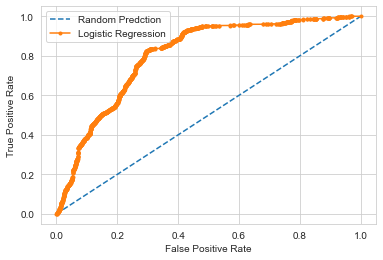

In [262]:
#Plotting AUC for Logistic Regression

from sklearn.metrics import  roc_curve, roc_auc_score

lr_prob=model_logistic.predict_proba(X_test_over)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test_over))]
ns_auc=roc_auc_score(y_test_over, ns_prob)
lr_auc=roc_auc_score(y_test_over,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =",lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test_over,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test_over,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC random predictions = 0.5
AUC predictions from XGB model = 0.9994991265047012


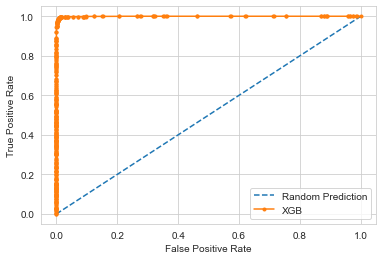

In [263]:
#Plotting AUC for XGB Model.


from sklearn.metrics import  roc_curve, roc_auc_score

XGb_prob=my_model.predict_proba(X_test_over)                                              
XGb_prob=XGb_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test_over))]
ns_auc=roc_auc_score(y_test_over, ns_prob)
XGb_auc=roc_auc_score(y_test_over,XGb_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from XGB model =", XGb_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test_over,ns_prob)
XGb_fpr,XGb_tpr,_=roc_curve(y_test_over,XGb_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(XGb_fpr,XGb_tpr,marker='.',label='XGB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC random predictions = 0.5
AUC predictions from GNB model = 0.9994991265047012


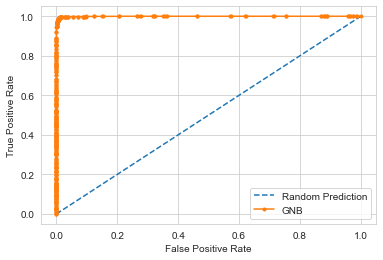

In [264]:
#Plotting AUC for GaussianNB() Model

from sklearn.metrics import  roc_curve, roc_auc_score

gnb_prob=my_model.predict_proba(X_test_over)                                              
gnb_prob=gnb_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test_over))]
ns_auc=roc_auc_score(y_test_over, ns_prob)
gnb_auc=roc_auc_score(y_test_over,gnb_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from GNB model =", gnb_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test_over,ns_prob)
gnb_fpr,gnb_tpr,_=roc_curve(y_test_over,gnb_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(gnb_fpr,gnb_tpr,marker='.',label='GNB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [265]:
#Threshold for the XGB model.


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


Thresh = [.50, .75, .80]
# We need to store the results in   DF
results = pd.DataFrame(columns=["Thresh", "Accuracy", "True Positive Rate", "True Negative Rate", "False Postive Rate", "Precision", "F1-Score"]) # df to store results

# Create threshold row
results['Thresh'] = Thresh                                                                        
             
x = 0                                                                                                      

# Iterating over the 3 thresholds

for i in Thresh:                                                                                       
    
    preds = np.where(my_model.predict_proba(X_test_over)[:,1] > i, 0, 1)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test_over, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100 # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[x,1] = accuracy_score(y_test_over, preds) 
    results.iloc[x,2] = recall_score(y_test_over, preds)
    results.iloc[x,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[x,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[x,5] = precision_score(y_test_over, preds)
    results.iloc[x,6] = f1_score(y_test_over, preds)
   
   
    x += 1  #Incrementing x by 1

print('DISPLAYING  METRICS')
print( results.T)

Confusion matrix for threshold = 0.5
[[ 0.4526749  91.44032922]
 [90.61728395  1.27572016]]
 
Confusion matrix for threshold = 0.75
[[ 3.58024691 88.3127572 ]
 [91.72839506  0.16460905]]
 
Confusion matrix for threshold = 0.8
[[ 5.63786008 86.25514403]
 [91.89300412  0.        ]]
 
DISPLAYING  METRICS
                      0    1    2
Thresh             0.50 0.75 0.80
Accuracy           0.01 0.02 0.03
True Positive Rate 0.00 0.04 0.06
True Negative Rate 0.01 0.00 0.00
False Postive Rate 0.99 1.00 1.00
Precision          0.00 0.04 0.06
F1-Score           0.00 0.04 0.06


In [266]:
#Threshold for the Logistic model




Thresh = [.50, .75, .80]
# We need to store the results in   DF
results = pd.DataFrame(columns=["Thresh", "Accuracy", "True Positive Rate", "True Negative Rate", "False Postive Rate", "Precision", "F1-Score"]) # df to store results

# Create threshold row
results['Thresh'] = Thresh                                                                        
             
x = 0                                                                                                      

# Iterating over the 3 thresholds

for i in Thresh:                                                                                       
    
    preds = np.where(model_logistic.predict_proba(X_test_over)[:,1] > i, 0, 1)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test_over, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100 # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[x,1] = accuracy_score(y_test_over, preds) 
    results.iloc[x,2] = recall_score(y_test_over, preds)
    results.iloc[x,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[x,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[x,5] = precision_score(y_test_over, preds)
    results.iloc[x,6] = f1_score(y_test_over, preds)
   
   
    x += 1  #Incrementing x by 1

print('DISPLAYING  METRICS')
print( results.T)

Confusion matrix for threshold = 0.5
[[15.55555556 76.33744856]
 [63.82716049 28.06584362]]
 
Confusion matrix for threshold = 0.75
[[53.99176955 37.90123457]
 [81.76954733 10.12345679]]
 
Confusion matrix for threshold = 0.8
[[76.83127572 15.0617284 ]
 [87.57201646  4.32098765]]
 
DISPLAYING  METRICS
                      0    1    2
Thresh             0.50 0.75 0.80
Accuracy           0.24 0.35 0.44
True Positive Rate 0.17 0.59 0.84
True Negative Rate 0.31 0.11 0.05
False Postive Rate 0.69 0.89 0.95
Precision          0.20 0.40 0.47
F1-Score           0.18 0.47 0.60


In [267]:

#Threshold for the Gaussian model

Thresh = [.50, .75, .80]
# We need to store the results in   DF
results = pd.DataFrame(columns=["Thresh", "Accuracy", "True Positive Rate", "True Negative Rate", "False Postive Rate", "Precision", "F1-Score"]) # df to store results

# Create threshold row
results['Thresh'] = Thresh                                                                        
             
x = 0                                                                                                      

# Iterating over the 3 thresholds

for i in Thresh:                                                                                       
    
    preds = np.where(gnb.predict_proba(X_test_over)[:,1] > i, 0, 1)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test_over, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100 # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[x,1] = accuracy_score(y_test_over, preds) 
    results.iloc[x,2] = recall_score(y_test_over, preds)
    results.iloc[x,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[x,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[x,5] = precision_score(y_test_over, preds)
    results.iloc[x,6] = f1_score(y_test_over, preds)
   
   
    x += 1  #Incrementing x by 1

print('DISPLAYING  METRICS')
print( results.T)

Confusion matrix for threshold = 0.5
[[12.71604938 79.17695473]
 [54.48559671 37.40740741]]
 
Confusion matrix for threshold = 0.75
[[17.61316872 74.27983539]
 [63.62139918 28.27160494]]
 
Confusion matrix for threshold = 0.8
[[18.23045267 73.66255144]
 [64.27983539 27.61316872]]
 
DISPLAYING  METRICS
                      0    1    2
Thresh             0.50 0.75 0.80
Accuracy           0.27 0.25 0.25
True Positive Rate 0.14 0.19 0.20
True Negative Rate 0.41 0.31 0.30
False Postive Rate 0.59 0.69 0.70
Precision          0.19 0.22 0.22
F1-Score           0.16 0.20 0.21
